In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import numpy as np
import ast
import os
import random
import shutil
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import glob
import json

#  <h1>JSON to CSV

In [39]:
json_file = '/content/drive/MyDrive/Colab_Skin_Disease/11 july 2023 (2).json'

In [40]:
# Load the JSON data
with open(json_file, 'r') as file:
    data = json.load(file)

# Extract the regions from the JSON data
regions = []
for filename, file_data in data['_via_img_metadata'].items():
    if 'filename' and 'regions' in file_data:
        for region in file_data['regions']:
            if region is not None:
                region_attributes = region.get('region_attributes', {})
                if region_attributes is None:
                    region_attributes = {}

                shape_attributes = region.get('shape_attributes', {})
                if shape_attributes is not None:
                  region_dict = {
                            'filename':file_data['filename'],
                            'region_shape_attributes':shape_attributes,
                            'region_attributes': region_attributes
                        }
                  regions.append(region_dict)
    # break

# Create the DataFrame
df = pd.DataFrame(regions)

# Print the DataFrame
df

,filename,region_shape_attributes,region_attributes
0,1a.jpeg,"{'name': 'circle', 'cx': 441, 'cy': 631, 'r': ...",{'Acne scars ': '1'}
1,1a.jpeg,"{'name': 'circle', 'cx': 455, 'cy': 632, 'r': ...","{'Wrinkels': '', 'Melasma': '', 'Frackels': ''..."
2,1a.jpeg,"{'name': 'circle', 'cx': 408, 'cy': 662, 'r': 10}","{'Wrinkels': '', 'Melasma': '', 'Frackels': ''..."
3,b1.jpeg,"{'name': 'circle', 'cx': 335, 'cy': 406, 'r': 12}","{'Wrinkels': '', 'Melasma': '', 'Frackels': ''..."
4,b1.jpeg,"{'name': 'circle', 'cx': 358, 'cy': 285, 'r': 6}","{'Wrinkels': '', 'Melasma': '', 'Frackels': '1..."
...,...,...,...
1773,z2.JPG,"{'name': 'circle', 'cx': 1410, 'cy': 2363, 'r'...","{'Wrinkels': '', 'Melasma': '', 'Acne scars ':..."
1774,z2.JPG,"{'name': 'circle', 'cx': 1487, 'cy': 2032, 'r'...","{'Wrinkels': '', 'Melasma': '', 'Acne scars ':..."
1775,z2.JPG,"{'name': 'circle', 'cx': 1657, 'cy': 2494, 'r'...","{'Wrinkels': '', 'Melasma': '', 'Acne scars ':..."
1776,z3.JPG,"{'name': 'circle', 'cx': 1472, 'cy': 1785, 'r'...","{'Wrinkels': '', 'Melasma': '', 'Acne scars ':..."


In [5]:
df.to_csv('/content/drive/MyDrive/Colab_Skin_Disease/json_to_csv.csv',index=False)

# <h1>CSV to proper format

In [6]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Skin_Disease/json_to_csv.csv')
df

,filename,region_shape_attributes,region_attributes
0,1a.jpeg,"{'name': 'circle', 'cx': 441, 'cy': 631, 'r': ...",{'Acne scars ': '1'}
1,1a.jpeg,"{'name': 'circle', 'cx': 455, 'cy': 632, 'r': ...","{'Wrinkels': '', 'Melasma': '', 'Frackels': ''..."
2,1a.jpeg,"{'name': 'circle', 'cx': 408, 'cy': 662, 'r': 10}","{'Wrinkels': '', 'Melasma': '', 'Frackels': ''..."
3,b1.jpeg,"{'name': 'circle', 'cx': 335, 'cy': 406, 'r': 12}","{'Wrinkels': '', 'Melasma': '', 'Frackels': ''..."
4,b1.jpeg,"{'name': 'circle', 'cx': 358, 'cy': 285, 'r': 6}","{'Wrinkels': '', 'Melasma': '', 'Frackels': '1..."
...,...,...,...
1773,z2.JPG,"{'name': 'circle', 'cx': 1410, 'cy': 2363, 'r'...","{'Wrinkels': '', 'Melasma': '', 'Acne scars ':..."
1774,z2.JPG,"{'name': 'circle', 'cx': 1487, 'cy': 2032, 'r'...","{'Wrinkels': '', 'Melasma': '', 'Acne scars ':..."
1775,z2.JPG,"{'name': 'circle', 'cx': 1657, 'cy': 2494, 'r'...","{'Wrinkels': '', 'Melasma': '', 'Acne scars ':..."
1776,z3.JPG,"{'name': 'circle', 'cx': 1472, 'cy': 1785, 'r'...","{'Wrinkels': '', 'Melasma': '', 'Acne scars ':..."


<h1> Handling duplicate filename. >>>> b1.JPG --> ba1.JPG

In [ ]:
#@title
# # Finding images with same names
# file_names = (os.listdir('/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12'))

# name_list = []
# for name in file_names:
#   name_list.append(name.split('.')[0])
#   # print(name.split('.')[0])

In [ ]:
#@title
# new = []
# for a in name_list:
#     n = name_list.count(a)
#     if n > 1:
#         if new.count(a) == 0:
#             new.append(a+'.JPG')
# print(new)

In [ ]:
#@title
# # Renaming in directory
# dir = '/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12/'
# for name in new:
#   old_name = dir + name
#   first_letter = name.split('.')[0][:-1]
#   number = name.split('.')[0][-1:]
#   extention =  name.split('.')[1]
#   # print(name)
#   # print(first_letter, number)
#   new_name = dir + first_letter + 'a' + number + '.' + extention
#   try:
#     os.rename(old_name, new_name)
#     print(old_name,new_name)
#   except:
#     print(name,"Already changed")
#   # break

In [7]:
o = ['b1.JPG','b2.JPG','b3.JPG','c1.JPG','c2.JPG','d1.JPG','d2.JPG','d3.JPG','e1.JPG','e2.JPG','e3.JPG','f2.JPG','g1.JPG','g2.JPG','g3.JPG','h1.JPG','h2.JPG','i1.JPG','i2.JPG','i3.JPG','j2.JPG','j3.JPG','k1.JPG','k2.JPG','k3.JPG','l1.JPG','l2.JPG','m1.JPG','m3.JPG','m4.JPG','n1.JPG','o1.JPG','p1.JPG','p3.JPG','q1.JPG','q2.JPG','r1.JPG','r2.JPG','r3.JPG','s1.JPG','s2.JPG','s3.JPG','v1.JPG','v3.JPG','w1.JPG','w2.JPG','x1.JPG','x2.JPG','y1.JPG','y2.JPG','z1.JPG','z2.JPG','z3.JPG']
n = ['ba1.JPG','ba2.JPG','ba3.JPG','ca1.JPG','ca2.JPG','da1.JPG','da2.JPG','da3.JPG','ea1.JPG','ea2.JPG','ea3.JPG','fa2.JPG','ga1.JPG','ga2.JPG','ga3.JPG','ha1.JPG','ha2.JPG','ia1.JPG','ia2.JPG','ia3.JPG','ja2.JPG','ja3.JPG','ka1.JPG','ka2.JPG','ka3.JPG','la1.JPG','la2.JPG','ma1.JPG','ma3.JPG','ma4.JPG','na1.JPG','oa1.JPG','pa1.JPG','pa3.JPG','qa1.JPG','qa2.JPG','ra1.JPG','ra2.JPG','ra3.JPG','sa1.JPG','sa2.JPG','sa3.JPG','va1.JPG','va3.JPG','wa1.JPG','wa2.JPG','xa1.JPG','xa2.JPG','ya1.JPG','ya2.JPG','za1.JPG','za2.JPG','za3.JPG']

In [8]:
df['filename'] = df['filename'].replace(o, n)

In [9]:
df

,filename,region_shape_attributes,region_attributes
0,1a.jpeg,"{'name': 'circle', 'cx': 441, 'cy': 631, 'r': ...",{'Acne scars ': '1'}
1,1a.jpeg,"{'name': 'circle', 'cx': 455, 'cy': 632, 'r': ...","{'Wrinkels': '', 'Melasma': '', 'Frackels': ''..."
2,1a.jpeg,"{'name': 'circle', 'cx': 408, 'cy': 662, 'r': 10}","{'Wrinkels': '', 'Melasma': '', 'Frackels': ''..."
3,b1.jpeg,"{'name': 'circle', 'cx': 335, 'cy': 406, 'r': 12}","{'Wrinkels': '', 'Melasma': '', 'Frackels': ''..."
4,b1.jpeg,"{'name': 'circle', 'cx': 358, 'cy': 285, 'r': 6}","{'Wrinkels': '', 'Melasma': '', 'Frackels': '1..."
...,...,...,...
1773,za2.JPG,"{'name': 'circle', 'cx': 1410, 'cy': 2363, 'r'...","{'Wrinkels': '', 'Melasma': '', 'Acne scars ':..."
1774,za2.JPG,"{'name': 'circle', 'cx': 1487, 'cy': 2032, 'r'...","{'Wrinkels': '', 'Melasma': '', 'Acne scars ':..."
1775,za2.JPG,"{'name': 'circle', 'cx': 1657, 'cy': 2494, 'r'...","{'Wrinkels': '', 'Melasma': '', 'Acne scars ':..."
1776,za3.JPG,"{'name': 'circle', 'cx': 1472, 'cy': 1785, 'r'...","{'Wrinkels': '', 'Melasma': '', 'Acne scars ':..."


In [10]:
def circle_to_box(shape, filename,img_path):
    cx = shape['cx']
    cy = shape['cy']
    r = shape['r']

    height = 2 * r
    width = 2 * r

    # get image
    filepath = img_path + filename
    try:
      img = Image.open(filepath)
    except:
      print(filename,' Does not exist!')
      return None
    # get width and height
    img_width,img_height = img.size

    df.at[index, 'x_center'] = cx
    df.at[index, 'y_center'] = cy
    df.at[index, 'bbox_height'] = height
    df.at[index, 'bbox_width'] = width
    df.at[index, 'image_height'] = img_height
    df.at[index, 'image_width'] = img_width

    df.at[index, 'region_shape_attributes'] = None

In [11]:
def polyline_to_box(shape, filename,img_path):
    x_cords = shape['all_points_x']
    y_cords = shape['all_points_y']

    x_min = min(x_cords)
    x_max = max(x_cords)
    y_min = min(y_cords)
    y_max = max(y_cords)

    x_c = sum(x_cords) / len(x_cords)
    y_c = sum(y_cords) / len(y_cords)

    width = x_max - x_min
    height = y_max - y_min

    # get image
    filepath = img_path + filename
    try:
      img = Image.open(filepath)
    except:
      print(filename,' Does not exist!')
      return None
    # get width and height
    img_width,img_height = img.size

    df.at[index, 'x_center'] = x_c
    df.at[index, 'y_center'] = y_c
    df.at[index, 'bbox_width'] = width
    df.at[index, 'bbox_height'] = height
    df.at[index, 'image_height'] = img_height
    df.at[index, 'image_width'] = img_width

    df.at[index, 'region_shape_attributes'] = None

In [12]:
def rect_to_box(shape, filename,img_path):
    x = shape['x']
    y = shape['y']
    width = shape['width']
    height = shape['height']

    cx = x + width/2
    cy = y + height/2

    # get image
    filepath = img_path + filename
    try:
      img = Image.open(filepath)
    except:
      print(filename,' Does not exist!')
      return None
    # get width and height
    img_width,img_height = img.size

    df.at[index, 'x_center'] = cx
    df.at[index, 'y_center'] = cy
    df.at[index, 'bbox_height'] = height
    df.at[index, 'bbox_width'] = width
    df.at[index, 'image_height'] = img_height
    df.at[index, 'image_width'] = img_width

    df.at[index, 'region_shape_attributes'] = None

In [13]:
def extract_values(string):
    # "ast.literal_eval()" parses the string into a dictionary.
    dic = ast.literal_eval(string)

    selected_keys = []

    for key, val in dic.items():
        if val == "1":
            selected_keys.append(key.strip())
            #print(selected_keys,'key: ',key)

    return ','.join(map(str, selected_keys))

In [14]:
def yolo_normalise(df):
  for index, row in df.iterrows():
    img_height = row['image_height']
    img_width = row['image_width']

    # X cordinate divided by whole image width
    df.at[index, 'x_center'] /= img_width
    # Y cordinate divided by whole image height
    df.at[index, 'y_center'] /= img_height
    # Box width divided by whole image width
    df.at[index, 'bbox_width'] /= img_width
    # Box height divided by whole image height
    df.at[index, 'bbox_height'] /= img_height
  return df

In [15]:
# df = df.drop(['file_size','file_attributes','region_id','region_count'],axis=1)

>Converting circles and polylines to bounding box coordinates

In [16]:
All_imgs_path = "/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12/"

for index, row in df.iterrows():
    # "ast.literal_eval()" parses the string into a dictionary.
    shape = ast.literal_eval(row['region_shape_attributes'])

    if shape['name'] == 'circle':
        circle_to_box(shape, row['filename'], All_imgs_path)
    elif shape['name'] == 'polyline':
        polyline_to_box(shape, row['filename'], All_imgs_path)
    elif shape['name'] == 'rect':
        rect_to_box(shape, row['filename'], All_imgs_path)
    else:
      print(shape['name'])

bbbbb1.JPG  Does not exist!
bbbbb1.JPG  Does not exist!
bbbbb1.JPG  Does not exist!
bbbbb2.JPG  Does not exist!
bbbbb2.JPG  Does not exist!
bbbbb2.JPG  Does not exist!
bbbbb2.JPG  Does not exist!
bbbbb2.JPG  Does not exist!
bbbbb2.JPG  Does not exist!
bbbbb3.JPG  Does not exist!
bbbbb3.JPG  Does not exist!
bbbbb3.JPG  Does not exist!
bbbbb3.JPG  Does not exist!
ccccc1.JPG  Does not exist!
ccccc1.JPG  Does not exist!
ccccc1.JPG  Does not exist!
ccccc1.JPG  Does not exist!
ccccc1.JPG  Does not exist!
ccccc1.JPG  Does not exist!
ccccc2.JPG  Does not exist!
ddddd5.JPG  Does not exist!
ddddd5.JPG  Does not exist!
ddddd6.JPG  Does not exist!
ddddd6.JPG  Does not exist!
ddddd6.JPG  Does not exist!
ddddd7.JPG  Does not exist!
ddddd7.JPG  Does not exist!
eeeee1.JPG  Does not exist!
eeeee1.JPG  Does not exist!
eeeee1.JPG  Does not exist!
eeeee1.JPG  Does not exist!
eeeee1.JPG  Does not exist!
eeeee1.JPG  Does not exist!
eeeee1.JPG  Does not exist!
eeeee2.JPG  Does not exist!
eeeee2.JPG  Does not

>Converting Attributes to proper format

In [17]:
# "Apply()" calls "extract_values()" on all elements in "region_attributes" column
df['class'] = df['region_attributes'].apply(extract_values)

>Normalising in YOLO format

In [18]:
df = yolo_normalise(df)

In [19]:
df

,filename,region_shape_attributes,region_attributes,x_center,y_center,bbox_height,bbox_width,image_height,image_width,class
0,1a.jpeg,None,{'Acne scars ': '1'},0.588000,0.473013,0.004751,0.008451,1334.0,750.0,Acne scars
1,1a.jpeg,None,"{'Wrinkels': '', 'Melasma': '', 'Frackels': ''...",0.606667,0.473763,0.009685,0.017227,1334.0,750.0,
2,1a.jpeg,None,"{'Wrinkels': '', 'Melasma': '', 'Frackels': ''...",0.544000,0.496252,0.014993,0.026667,1334.0,750.0,Acne scars
3,b1.jpeg,None,"{'Wrinkels': '', 'Melasma': '', 'Frackels': ''...",0.446667,0.304348,0.017991,0.032000,1334.0,750.0,Acne scars
4,b1.jpeg,None,"{'Wrinkels': '', 'Melasma': '', 'Frackels': '1...",0.477333,0.213643,0.008996,0.016000,1334.0,750.0,Frackels
...,...,...,...,...,...,...,...,...,...,...
1773,za2.JPG,None,"{'Wrinkels': '', 'Melasma': '', 'Acne scars ':...",0.466270,0.586062,0.057540,0.076720,4032.0,3024.0,Acne scars
1774,za2.JPG,None,"{'Wrinkels': '', 'Melasma': '', 'Acne scars ':...",0.491733,0.503968,0.043155,0.057540,4032.0,3024.0,Acne scars
1775,za2.JPG,None,"{'Wrinkels': '', 'Melasma': '', 'Acne scars ':...",0.547950,0.618552,0.027461,0.036614,4032.0,3024.0,"Freckels,Frackels"
1776,za3.JPG,None,"{'Wrinkels': '', 'Melasma': '', 'Acne scars ':...",0.486772,0.442708,0.081349,0.108466,4032.0,3024.0,


In [20]:
data = df[df['class'].apply(len) == 0]
temp_df = pd.DataFrame(data)

# Display the full content of the 'region_attributes' column with index
for index, row in temp_df.iterrows():
    print(index, row['filename'], row['region_attributes'])

1 1a.jpeg {'Wrinkels': '', 'Melasma': '', 'Frackels': '', 'Acne scars ': '1\n', 'Uneven Skin tone ': '', 'Mole and Tags': ''}
152 g1.jpeg {'Wrinkels': '', 'Melasma': '', 'Frackels': '', 'Acne scars ': '', 'Uneven Skin tone ': '', 'Mole and Tags': '', 'Acne': ''}
244 j1.jpeg {'Wrinkels': '', 'Melasma': '', 'Frackels': '', 'Acne scars ': '', 'Uneven Skin tone ': '', 'Mole and Tags': '', 'Acne': '1\n'}
260 j2.jpeg {'Wrinkels': '', 'Melasma': '', 'Frackels': '', 'Acne scars ': '', 'Uneven Skin tone ': '', 'Mole and Tags': '', 'Acne': ''}
274 j2.jpeg {'Wrinkels': '', 'Melasma': '', 'Frackels': '', 'Acne scars ': '', 'Uneven Skin tone ': '', 'Mole and Tags': '', 'Acne': ''}
275 j2.jpeg {'Wrinkels': '', 'Melasma': '', 'Frackels': '', 'Acne scars ': '1\n', 'Uneven Skin tone ': '', 'Mole and Tags': '', 'Acne': ''}
368 l2.jpeg {'Wrinkels': '', 'Melasma': '', 'Frackels': '', 'Acne scars ': '', 'Uneven Skin tone ': '', 'Mole and Tags': '', 'Acne': ''}
708 ee1.jpeg {'Wrinkels': '', 'Melasma': '', '

In [21]:
df.loc[1, 'class'] = "Acne scars"
df.loc[244, 'class'] = "Acne"
df.loc[275, 'class'] = "Acne scars"
df.loc[961, 'class'] = "Acne"
df.loc[975, 'class'] = "Mole and Tags"
df.loc[1004, 'class'] = "Dark Circles"

In [22]:
#assigning None to region_attributes where updated.
df.loc[df['class'].apply(len) > 0, 'region_attributes'] = None

In [23]:
#only selecting where class is not empty
df = df[df['class'] != '']

In [24]:
# because all sttributes are converted to their values.
df = df.drop("region_shape_attributes",axis=1)

#beacuse all of them are epmty
df = df.drop("region_attributes",axis=1)

In [25]:
column_to_move = df.pop("class")
# insert column with insert(location, column_name, column_value)
df.insert(1, "class", column_to_move)

In [26]:
df['class'].unique()

array(['Acne scars', 'Frackels', 'Wrinkels', 'Mole and Tags', 'Acne',
       'Uneven Skin tone', 'Melasma', 'Dark Circles',
       'Wrinkels,Dark Circles', 'Tear Trough', 'Wrinkels,Frackels',
       'Freckels', 'Freckels,Frackels'], dtype=object)

In [27]:
#fixing speling mistake
df.loc[df['class'] == 'Freckels', 'class'] = 'Frackels'
df.loc[df['class'] == 'Freckels,Frackels', 'class'] = 'Frackels'

In [28]:
df = df[~df['class'].isin(['Wrinkels,Frackels','Wrinkels,Dark Circles'])]

In [29]:
df

,filename,class,x_center,y_center,bbox_height,bbox_width,image_height,image_width
0,1a.jpeg,Acne scars,0.588000,0.473013,0.004751,0.008451,1334.0,750.0
1,1a.jpeg,Acne scars,0.606667,0.473763,0.009685,0.017227,1334.0,750.0
2,1a.jpeg,Acne scars,0.544000,0.496252,0.014993,0.026667,1334.0,750.0
3,b1.jpeg,Acne scars,0.446667,0.304348,0.017991,0.032000,1334.0,750.0
4,b1.jpeg,Frackels,0.477333,0.213643,0.008996,0.016000,1334.0,750.0
...,...,...,...,...,...,...,...,...
1772,za2.JPG,Acne,0.431548,0.560516,0.035218,0.046958,4032.0,3024.0
1773,za2.JPG,Acne scars,0.466270,0.586062,0.057540,0.076720,4032.0,3024.0
1774,za2.JPG,Acne scars,0.491733,0.503968,0.043155,0.057540,4032.0,3024.0
1775,za2.JPG,Frackels,0.547950,0.618552,0.027461,0.036614,4032.0,3024.0


In [30]:
df[df.isna().any(axis=1)].filename.unique()

array(['bbbbb1.JPG', 'bbbbb2.JPG', 'bbbbb3.JPG', 'ccccc1.JPG',
       'ccccc2.JPG', 'ddddd5.JPG', 'ddddd6.JPG', 'ddddd7.JPG',
       'eeeee1.JPG', 'eeeee2.JPG', 'fffff5.JPG', 'ggggg1.JPG',
       'ggggg2.JPG', 'ggggg3.JPG', 'iiiii2.JPG', 'iiiii3.JPG',
       'IMG_7413.JPG', 'IMG_7414.JPG', 'IMG_7415.JPG', 'IMG_7416.JPG',
       'IMG_7417.JPG'], dtype=object)

In [31]:
df = df.dropna()

In [32]:
df

,filename,class,x_center,y_center,bbox_height,bbox_width,image_height,image_width
0,1a.jpeg,Acne scars,0.588000,0.473013,0.004751,0.008451,1334.0,750.0
1,1a.jpeg,Acne scars,0.606667,0.473763,0.009685,0.017227,1334.0,750.0
2,1a.jpeg,Acne scars,0.544000,0.496252,0.014993,0.026667,1334.0,750.0
3,b1.jpeg,Acne scars,0.446667,0.304348,0.017991,0.032000,1334.0,750.0
4,b1.jpeg,Frackels,0.477333,0.213643,0.008996,0.016000,1334.0,750.0
...,...,...,...,...,...,...,...,...
1772,za2.JPG,Acne,0.431548,0.560516,0.035218,0.046958,4032.0,3024.0
1773,za2.JPG,Acne scars,0.466270,0.586062,0.057540,0.076720,4032.0,3024.0
1774,za2.JPG,Acne scars,0.491733,0.503968,0.043155,0.057540,4032.0,3024.0
1775,za2.JPG,Frackels,0.547950,0.618552,0.027461,0.036614,4032.0,3024.0


In [33]:
df.filename.nunique()

339

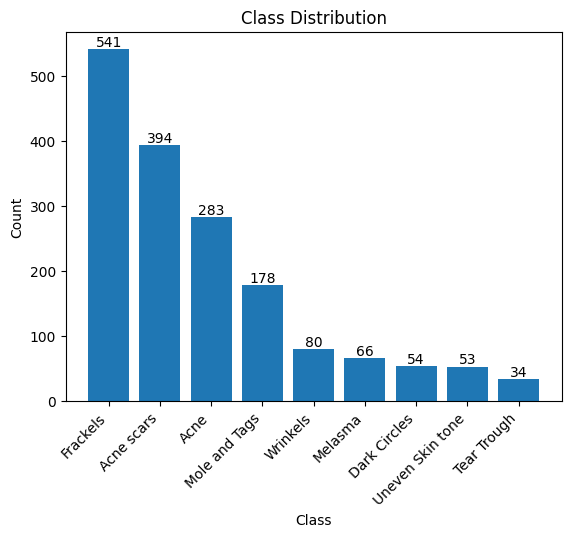

In [35]:
class_distribution = df['class'].value_counts()

plt.bar(class_distribution.index, class_distribution.values)

for i, value in enumerate(class_distribution.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')

plt.show()

In [36]:
df.to_csv('/content/drive/MyDrive/Colab_Skin_Disease/1683inst_339imgs.csv',index=False)

<h1>Plotting

In [ ]:
import pandas as pd
import numpy as np
import cv2
import os
import ast
import random
import shutil
from PIL import Image
import glob
import matplotlib.pyplot as plt
from IPython.display import display
import matplotlib.patches as patches

In [ ]:
def load_images_from_folder(folder_path):
    img_dict = {}
    filenames = sorted(os.listdir(folder_path))

    for filename in filenames:
        image_path = os.path.join(folder_path, filename)
        img_dict[filename] = image_path

    return img_dict

In [ ]:
def extract_annots_df(df, file_name):
    anno = []

    df = df[df["filename"] == file_name]

    for index, row in df.iterrows():
        data = {}
        data["img_h"] = row['image_height']
        data["img_w"] = row['image_width']
        data["bbox_h"] = row['bbox_height']
        data["bbox_w"] = row['bbox_width']

        #Converting Center coordinates to bottom left coordinates JUST for PLOTTING
        data["cx"] = row['x_center'] - (row['bbox_width'] / 2)
        data["cy"] = row['y_center'] - (row['bbox_height'] / 2)

        data["disease"] = row['class']
        data["color"] = assign_color(label=row['class'])

        anno.append(data)
    return anno

In [ ]:
def plot(image_path, annots, name, key):
    img = Image.open(image_path)
    fig, ax = plt.subplots(1, 2, figsize=(8, 5))
    ax[0].imshow(img)
    ax[0].axis('off')
    ax[0].set_title(name)

    for i in annots:
        x, y, h, w = i["cx"],i["cy"], i["bbox_h"], i["bbox_w"]
        img_w, img_h, color = i['img_w'], i['img_h'], i["color"]

        if color:
          #Multipying with image width and height to DENORMALISE jut for plotting.
          rect = patches.Rectangle((x*img_w, y*img_h), w*img_w, h*img_h, linewidth=0.5, edgecolor=color, facecolor='none')
          ax[0].add_artist(rect)

    key = Image.open(key)
    ax[1].imshow(key)
    ax[1].axis('off')

    plt.show()

In [ ]:
def assign_color(label):
    if label == "Frackels":
        return "red"
    elif label == "Acne":
        return "green"
    elif label == "Acne scars":
        return "blue"
    elif label == "Melasma":
        return "yellow"
    elif label == "Uneven Skin tone":
        return "white"
    elif label == "Mole and Tags":
        return "purple"
    elif label == "Wrinkels":
        return "cyan"
    elif label == "Dark Circles":
        return "gray"
    elif label == "Tear Trough":
        return "magenta"
    else:
        return "black"

In [ ]:
images_dir = '/content/drive/MyDrive/Colab_Skin_Disease/via-2.0.12'

In [ ]:
key = '/content/drive/MyDrive/Colab_Skin_Disease/All_diseases_key.drawio.png'

In [ ]:
images = load_images_from_folder(images_dir)

In [ ]:
n = sorted(os.listdir(images_dir))
n2 = df.filename.unique().tolist()
s = set(n2)
temp3 = [x for x in n if x not in s]
print('No. files with no annots:',len(temp3))

No. files with no annots: 0


In [ ]:
#Removing files without annots.
# for filename in temp3:
#   path = images_dir +'/'+ filename
#   if os.path.exists(path):
#     os.remove(path)
#   else:
#     print("The file does not exist")

In [ ]:
def crop_and_save(image_path, annots, save_folder,name):
    img = Image.open(image_path)
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(img)
    ax[0].axis('off')
    ax[0].set_title('Original Image')

    cropped_images = []

    for i, annot in enumerate(annots):
        x, y, h, w = annot["cx"], annot["cy"], annot["bbox_h"], annot["bbox_w"]
        img_w, img_h, color = annot['img_w'], annot['img_h'], annot["color"]

        if color:
            # Multiplying with image width and height to DENORMALIZE just for plotting.
            rect = patches.Rectangle((x * img_w, y * img_h), w * img_w, h * img_h, linewidth=0.5, edgecolor=color, facecolor='none')
            ax[0].add_artist(rect)

        # Calculate the coordinates for cropping the image patch
        x_start = max(0, int(x * img_w))
        y_start = max(0, int(y * img_h))
        x_end = min(int((x + w) * img_w), img.width)
        y_end = min(int((y + h) * img_h), img.height)

        # Crop the bounding box from the image
        cropped_image = img.crop((x_start, y_start, x_end, y_end))
        cropped_images.append(cropped_image)

        # Save the cropped image to the specified folder
        save_path = os.path.join(save_folder, f"{name.split('.')[0]}_{i+1}.jpg")
        cropped_image.save(save_path)

    if len(cropped_images) > 0:
        # Resize the cropped images to have the same height
        min_height = min(img.height for img in cropped_images)
        resized_images = [img.resize((int(img.width * min_height / img.height), min_height)) for img in cropped_images]

        # Create a montage of the resized images
        montage = np.hstack(resized_images)
        ax[1].imshow(montage)
        ax[1].axis('off')
        ax[1].set_title('Cropped Bounding Boxes')
    else:
        ax[1].axis('off')
        ax[1].set_title('No Bounding Boxes')

    plt.show()

In [ ]:
# folder = ['Acne scars', 'Wrinkels', 'Mole and Tags', 'Acne','Uneven Skin tone', 'Melasma', 'Dark Circles', 'Tear Trough']

# for x in folder:
#   df = pd.read_csv('/content/drive/MyDrive/Colab_Skin_Disease/1683inst_339imgs.csv')

#   df = df[df['class'].isin([x])]
#   onlyf = df.filename.unique()
#   print(x,'>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')

#   save = f'/content/drive/MyDrive/Colab_Skin_Disease/Patches/{x}'
#   for name, path in images.items():
#     if name in onlyf:
#       annots = extract_annots_df(df,name)
#       crop_and_save(path, annots,save,name)
#       print(name)
#       # break
#     # break

In [ ]:
files = df.filename.unique()
for name, path in images.items():
  if name in files:
    annots = extract_annots_df(df,name)
    plot(path, annots,name,key)
    print()
    # break

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df

,filename,class,x_center,y_center,bbox_height,bbox_width,image_height,image_width
4,b1.jpeg,Frackels,0.477333,0.213643,0.008996,0.016000,1334.0,750.0
5,b1.jpeg,Frackels,0.686667,0.267616,0.008996,0.016000,1334.0,750.0
6,b1.jpeg,Frackels,0.409333,0.234633,0.008958,0.015933,1334.0,750.0
7,b1.jpeg,Frackels,0.772000,0.455022,0.011994,0.021333,1334.0,750.0
8,b1.jpeg,Frackels,0.840000,0.435532,0.011994,0.021333,1334.0,750.0
...,...,...,...,...,...,...,...,...
1755,xa2.JPG,Frackels,0.213955,0.513889,0.072917,0.097222,4032.0,3024.0
1768,za1.JPG,Frackels,0.587963,0.586062,0.052562,0.070083,4032.0,3024.0
1769,za1.JPG,Frackels,0.655093,0.613839,0.049107,0.065476,4032.0,3024.0
1770,za1.JPG,Frackels,0.395503,0.568700,0.052083,0.069444,4032.0,3024.0


In [ ]:
dfold = pd.read_csv('/content/drive/MyDrive/Colab_Skin_Disease/1511inst_267imgs.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab_Skin_Disease/1683inst_339imgs.csv')
new_files = df.filename.unique()
old_files = dfold.filename.unique()

In [ ]:
new_alone =  list(set(new_files) - set(old_files))

In [ ]:
# len(old_files)
# new_files

In [ ]:
len(new_alone)

72

In [ ]:
df = df[df['filename'].isin(new_alone)]

In [ ]:
df_unique = df.drop_duplicates(subset=['filename'], keep='first')
counts = df_unique.groupby(['image_height', 'image_width']).size().reset_index(name='count')
counts

,image_height,image_width,count
0,4032.0,3024.0,72


In [ ]:
def calculate_average_area(data):
    class_areas = {}

    for _, row in data.iterrows():
        class_name = row['class']
        bbox_height = row['bbox_height']
        bbox_width = row['bbox_width']
        img_height = row['image_height']
        img_width = row['image_width']

        area = (bbox_height * img_height) * (bbox_width * img_width)
        class_areas.setdefault(class_name, []).append(area)

    average_areas = {}
    for class_name, areas in class_areas.items():
        average_area = sum(areas) / len(areas)
        average_areas[class_name] = average_area

    return average_areas

In [ ]:
average_areas_old = calculate_average_area(dfold)
for class_name, average_area in average_areas_old.items():
    print(f'{class_name}:\t\t {average_area}')

Acne scars:		 4375.530858282607
Frackels:		 965.1339412230766
Wrinkels:		 30133.833895301577
Mole and Tags:		 3637.0491803356576
Acne:		 5366.555026750984
Uneven Skin tone:		 28992.335367591833
Melasma:		 53987.85910369999
Dark Circles:		 20167.753840818175
Tear Trough:		 19267.774193548357


In [ ]:
average_areas_new = calculate_average_area(df)
for class_name, average_area in average_areas_new.items():
    print(f'{class_name}:\t\t {average_area}')

Acne scars:		 7422.404456467004
Frackels:		 2522.1591323105336
Wrinkels:		 60002.194192549985
Mole and Tags:		 6035.336855932575
Acne:		 13882.69200832508
Uneven Skin tone:		 35695.85722664149
Melasma:		 102298.97214163635
Dark Circles:		 38027.79942585182
Tear Trough:		 30417.970588235254


In [ ]:
def calculate_percent_change(old_value, new_value):
    percent_change = ((new_value - old_value) / old_value) * 100
    return percent_change

# Calculate percent change for each class
for class_name, old_value in average_areas_old.items():
    new_value = average_areas_new.get(class_name)
    if new_value is not None:
        percent_change = calculate_percent_change(old_value, new_value)
        print(f"{class_name}: {percent_change:.2f}%")
    else:
        print(f"No corresponding new value found for {class_name}")


Acne scars: 69.63%
Frackels: 161.33%
Wrinkels: 99.12%
Mole and Tags: 65.94%
Acne: 158.69%
Uneven Skin tone: 23.12%
Melasma: 89.49%
Dark Circles: 88.56%
Tear Trough: 57.87%
